Smoking status stratification

In [19]:
library(hei)
library(ggplot2)
library(dplyr)
library(ggrepel)
library(survey)

Non smokers

Import data and select disease variables

In [20]:
nahnes9906 <- load("nh_99-06.Rdata")
Labels <- read.csv("Outcome_Label.csv")

MainTable <- MainTable[ which(MainTable$SDDSRVYR=='4'),]
MainTableNonsmoke <- MainTable[ which(MainTable$RIDAGEYR >= 18 & MainTable$SMQ040==3),] 

MainTable_Health <- subset(MainTableNonsmoke, select = c("SEQN","SDMVPSU", "SDMVSTRA", "WTMEC2YR","RIDAGEYR","BMXBMI", "black", "mexican", "other_hispanic", "other_eth", "SMQ040", "male", "female", "any_diabetes", "any_ht", "cad", "bladder_cancer_self_report", "blood_cancer_self_report", "bone_cancer_self_report", "brain_cancer_self_report", "colon_cancer_self_report", "esophagus_cancer_self_report", "gallbladder_cancer_self_report", "kidney_cancer_self_report", "larynx_cancer_self_report", "leukemia_self_report", "liver_cancer_self_report", "lung_cancer_self_report", "lymphoma_self_report", "melanoma_self_report", "mouth_cancer_self_report", "nervous_cancer_self_report", "pancreatic_cancer_self_report", "prostate_cancer_self_report", "rectum_cancer_self_report", "skin_cancer_self_report", "other_skin_cancer_self_report", "soft_cancer_self_report", "stomach_cancer_self_report", "testis_cancer_self_report", "thyroid_cancer_self_report", "uterine_cancer_self_report", "other_cancer_self_report", "any_cancer_self_report", "any_family_cad", "current_asthma", "ever_asthma", "ever_arthritis", "ever_rheumatoid_arthritis", "ever_osteo_arthritis", "LBXHBC", "LBDHBG", "LBDHCV", "LBDHD", "LBXHBS", "LBXHA", "LBDHI"))


Biomarkers_Threshold <- subset(MainTableNonsmoke, select =c("LBXTC", "LBDLDL", "LBXTR", "LBXGH", "LBXGLU", "LBXVIA", "LBXVIC", "LBXVID", "LBXVIE",  "LBXB12", "LBXFOL", "LBXRBF", "LBXHCY"))


#*************Threshold values*************************

#Total cholesterol - Case <= 200
Biomarkers_Threshold$LBXTC_TH <- ifelse(Biomarkers_Threshold$LBXTC <= 200, 1, 0)
#LDL -  case < 100
Biomarkers_Threshold$LBDLDL_TH <- ifelse(Biomarkers_Threshold$LBDLDL <= 100, 1, 0)
#Triglycerides - case >= 150 
Biomarkers_Threshold$LBXTR_TH <- ifelse(Biomarkers_Threshold$LBXTR <= 150, 1, 0)
#Glycohemoglobin - case <= 5.7 
Biomarkers_Threshold$LBXGH_TH <- ifelse(Biomarkers_Threshold$LBXGH <= 5.7, 1, 0)
#Fasting Glucose -case <= 100
Biomarkers_Threshold$LBXGLU_TH <- ifelse(Biomarkers_Threshold$LBXGLU <= 100, 1, 0)
#Vitamin A - case >= 20 
Biomarkers_Threshold$LBXVIA_TH <- ifelse(Biomarkers_Threshold$LBXVIA >= 20, 1, 0)
#vitamin C - case >= 11.4
Biomarkers_Threshold$LBXVIC_TH <- ifelse(Biomarkers_Threshold$LBXVIC >= 11.4, 1, 0)
#vitamin D - case >= 20
Biomarkers_Threshold$LBXVID_TH <- ifelse(Biomarkers_Threshold$LBXVID >= 20, 1, 0)
#vitamin E - case >= 500
Biomarkers_Threshold$LBXVIE_TH <- ifelse(Biomarkers_Threshold$LBXVIE >= 500, 1, 0)
#vitamin B12 - case  >= 200
Biomarkers_Threshold$LBXB12_TH <- ifelse(Biomarkers_Threshold$LBXB12 >= 200, 1, 0)
#serum folate - case >= 2
Biomarkers_Threshold$LBXFOL_TH <- ifelse(Biomarkers_Threshold$LBXFOL >= 2, 1, 0)
#RBC FOLATE
Biomarkers_Threshold$LBXRBF_TH <- ifelse(Biomarkers_Threshold$LBXRBF >= 95, 1, 0)
#plasma homocysteine
Biomarkers_Threshold$LBXHCY_TH <- ifelse(Biomarkers_Threshold$LBXHCY <= 13, 1, 0)

Biomarkers_Threshold <- subset(Biomarkers_Threshold, select =c("LBXTC_TH", "LBDLDL_TH", "LBXTR_TH", "LBXGH_TH", "LBXGLU_TH", "LBXVIA_TH", "LBXVIC_TH", "LBXVID_TH", "LBXVIE_TH",  "LBXB12_TH", "LBXFOL_TH", "LBXRBF_TH", "LBXHCY_TH"))

Health_Biomarkers <- cbind(MainTable_Health, Biomarkers_Threshold)

phenotypesheath_biomarkers <- c("any_diabetes", "any_ht", "cad", "bladder_cancer_self_report", "blood_cancer_self_report", "bone_cancer_self_report", "brain_cancer_self_report", "colon_cancer_self_report", "esophagus_cancer_self_report", "gallbladder_cancer_self_report", "kidney_cancer_self_report", "larynx_cancer_self_report", "leukemia_self_report", "liver_cancer_self_report", "lung_cancer_self_report", "lymphoma_self_report", "melanoma_self_report", "mouth_cancer_self_report", "nervous_cancer_self_report", "pancreatic_cancer_self_report", "prostate_cancer_self_report", "rectum_cancer_self_report", "skin_cancer_self_report", "other_skin_cancer_self_report", "soft_cancer_self_report", "stomach_cancer_self_report", "testis_cancer_self_report", "thyroid_cancer_self_report", "uterine_cancer_self_report", "other_cancer_self_report", "any_cancer_self_report", "any_family_cad", "current_asthma", "ever_asthma", "ever_arthritis", "ever_rheumatoid_arthritis", "ever_osteo_arthritis", "LBXHBC", "LBDHBG", "LBDHCV", "LBDHD", "LBXHBS", "LBXHA", "LBDHI", "LBXTC_TH", "LBDLDL_TH", "LBXTR_TH", "LBXGH_TH", "LBXGLU_TH", "LBXVIA_TH", "LBXVIC_TH", "LBXVID_TH", "LBXVIE_TH",  "LBXB12_TH", "LBXFOL_TH", "LBXRBF_TH", "LBXHCY_TH")





using hei package to derive hei values for all individuals in subset

In [21]:
demo0506 <- get_demo("2005/2006")
diet0506 <- get_diet("2005/2006", "both")
fped0506 <- get_fped("2005/2006", "both")
hei0506 <- hei(fped0506, diet0506, demo0506)
hei0506 <- subset(hei0506, select = c(SEQN,HEI))

hei0506 <- hei0506 %>% mutate(quintile=ntile(HEI,5))

Processing SAS dataset DEMO_D 	 ..
Processing SAS dataset DR1TOT_D 	 ..
Processing SAS dataset DR2TOT_D 	 ..


Setting dataframe, cut, case, control and phenotype variables values - Can edit code if different dataframes, cuts or case control values desired to alternative analyses

In [22]:
dataframe <- Health_Biomarkers
cut <- "quintile"
case <- 5
control <- 1
phenotypes <- phenotypesheath_biomarkers

Merging quintile values to working data frame

In [23]:
hei0506_subset <- subset(hei0506, select = c("SEQN", cut))   #subset with cut (quintile) and SEQN
hei0506_subset$SEQN <- as.character( hei0506_subset$SEQN )    #change both 'SEQN' columns to characters for merging
dataframe$SEQN <- as.character( dataframe$SEQN )
hei0506_merged <- merge(dataframe, hei0506_subset, by="SEQN") 

Selecting cases and controls so that our subset consists of those in the top & bottom quintiles of the healthy eating index

In [24]:
hei0506_subset <- subset(hei0506, select = c("SEQN", cut))           #subset with quintile and SEQN
hei0506_subset$SEQN <- as.character( hei0506_subset$SEQN )          #change both 'SEQN' columns to characters for merging
dataframe$SEQN <- as.character( dataframe$SEQN )

hei0506_merged <- merge(dataframe, hei0506_subset, by="SEQN")     #merging qunitile with dataframe

hei0506_merged_cut <- hei0506_merged[hei0506_merged[,cut] %in% c(case, control),]   #selecting cases & control


hei0506_casecontrol <- subset(hei0506_merged_cut, select=c("SEQN", cut))#subsetting so we just have SEQN+cut 

hei0506_casecontrol[cut] <- ifelse(hei0506_casecontrol[cut]==case, 1, 0) #Converting case control to binary

hei0506_final <- inner_join(hei0506_merged, hei0506_casecontrol, by = "SEQN")  #Merge phenotypes w/ binary input
colNumber <- length(hei0506_final) - 1
colnames(hei0506_final)[colNumber] <- "casecontrol"
colNumber <- length(hei0506_final)
colnames(hei0506_final)[colNumber] <- "casevalue"

Setting survey design for use for survey weighted glm in the logistic regression

In [25]:
dsn <- svydesign(ids=~SDMVPSU, strata=~SDMVSTRA, weights=~WTMEC2YR, nest=T, data=hei0506_final, variables = NULL)

Creating dataframe for results

In [26]:
hei0506_result_Nonsmoke <- as.data.frame(matrix(ncol =8))

For loop to run logistic regression on each disease outcome

In [28]:
for(i in 14:ncol(hei0506_final)-2){
                                                                                        
 print( i )

myglm <- svyglm(as.formula(paste0(names(hei0506_final)[i], "~ casevalue + black + mexican + other_hispanic + other_eth + RIDAGEYR + RIDAGEYR^2 + female + BMXBMI")),design = dsn,
                family = binomial(),
                na.action = na.omit)

#confidence interval
ci <- exp(summary(myglm)$coefficients["casevalue",1]+qnorm(c(0.025, 0.975)) * summary(myglm)$coefficients["casevalue",2])


excludedPatients <- sum(is.na(hei0506_final[, i ]))
    casecontrol <-  hei0506_final[, c(names(hei0506_final)[i], "SEQN", "casevalue")]
    casecontrol <- na.omit( casecontrol )
    heihighpositive <- length(unique(casecontrol[casecontrol[,1]== 1 & casecontrol$casevalue== 1, "SEQN"]))
    heihighnegative <- length(unique(casecontrol[casecontrol[,1]== 0 & casecontrol$casevalue== 1, "SEQN"]))
    heilowpositive <- length(unique(casecontrol[casecontrol[,1]== 1 & casecontrol$casevalue== 0, "SEQN"]))
    heilownegative <- length(unique(casecontrol[casecontrol[,1]== 0 & casecontrol$casevalue== 0, "SEQN"]))
 

    
newRow <- c (names(hei0506_final)[i], summary(myglm)$coefficients[2], exp(summary(myglm)$coefficients[2]), paste0("(", round(ci[1][1],3), ",", round(ci[2][1],3), ")"),
summary(myglm)$coefficients[2,4], paste0(heihighpositive+heilowpositive,"(",heihighpositive,"/",heilowpositive,")"), paste0(heihighnegative+heilownegative,"(",heihighnegative,"/",heilownegative,")"), excludedPatients
                  )
    
hei0506_result_Nonsmoke <- rbind( newRow, hei0506_result_Nonsmoke ) 


}


[1] 12


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 13


Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 7 in model.matrix: no columns are assigned”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in model.matrix.default(glm.object, data = structure(list(female = c(0, :
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(glm.object, data = structure(list(female = c(0, :
“problem with term 7 in model.matrix: no columns are assigned”

[1] 14


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 15


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 16


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 17


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 18


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 19


Warning message:
“glm.fit: algorithm did not converge”

[1] 20


Warning message:
“glm.fit: algorithm did not converge”

[1] 21


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 22


Warning message:
“glm.fit: algorithm did not converge”

[1] 23


Warning message:
“glm.fit: algorithm did not converge”

[1] 24


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 25


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 26


Warning message:
“glm.fit: algorithm did not converge”

[1] 27


Warning message:
“glm.fit: algorithm did not converge”

[1] 28


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 29


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 30


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 31


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 32


Warning message:
“glm.fit: algorithm did not converge”

[1] 33


Warning message:
“glm.fit: algorithm did not converge”

[1] 34


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 35


Warning message:
“glm.fit: algorithm did not converge”

[1] 36


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 37


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 38


Warning message:
“glm.fit: algorithm did not converge”

[1] 39


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 40


Warning message:
“glm.fit: algorithm did not converge”

[1] 41


Warning message:
“glm.fit: algorithm did not converge”

[1] 42


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 43


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 44


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 45


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 46


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 47


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 48


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 49


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 50


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 51


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 52


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 53


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 54


Warning message:
“glm.fit: algorithm did not converge”

[1] 55


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 56


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 57


Warning message:
“glm.fit: algorithm did not converge”

[1] 58


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 59


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 60


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 61


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 62


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 63


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 64


Warning message:
“glm.fit: algorithm did not converge”

[1] 65


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 66


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 67


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 68


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 69


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 70


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

Changing column name and adding columns for adjusted p-values

In [29]:
colnames( hei0506_result_Nonsmoke) <- c("Outcome", "Coefficient", "OR", "CI", "P-value", "Outcome_Present", "Outcome_Negative", "NA_Patient")

hei0506_result_Nonsmoke$padjustFdr <- p.adjust( as.numeric( hei0506_result_Nonsmoke$`P-value`), method = "fdr")
hei0506_result_Nonsmoke$padjustBonferroni <- p.adjust( as.numeric( hei0506_result_Nonsmoke$`P-value`), method = "bonferroni")


hei0506_result_Nonsmoke$logfdr <- -log( as.numeric(hei0506_result_Nonsmoke$padjustFdr))
hei0506_result_Nonsmoke$logbonf <- -log( as.numeric(hei0506_result_Nonsmoke$padjustBonferroni))

hei0506_result_Nonsmoke <- merge(hei0506_result_Nonsmoke, Labels, by = "Outcome")

hei0506_result_Nonsmoke$Association <- as.factor(ifelse(hei0506_result_Nonsmoke$OR > 1, "OR > 1", "OR <= 1"))
head(hei0506_result_Nonsmoke)




Outcome,Coefficient,OR,CI,P-value,Outcome_Present,Outcome_Negative,NA_Patient,padjustFdr,padjustBonferroni,logfdr,logbonf,Label,Association
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
any_cancer_self_report,-0.638007860010233,0.52834391137452,"(0.293,0.953)",0.0717723873378996,74(51/23),416(281/135),1,3.024693e-01,1.000000e+00,1.19577534,0.000000,any cancer,OR <= 1
any_diabetes,0.690104917423089,1.99392471971266,"(0.947,4.197)",0.112040465041584,74(58/16),411(272/139),6,3.479151e-01,1.000000e+00,1.05579671,0.000000,diabetes,OR > 1
any_family_cad,-0.278385496051509,0.757004942842474,"(0.379,1.514)",0.456908711523458,70(46/24),406(276/130),15,9.295729e-01,1.000000e+00,0.07303005,0.000000,family CAD,OR <= 1
any_ht,-0.0141126636295072,0.985986453192556,"(0.622,1.562)",0.953728610038929,220(157/63),271(176/95),0,9.701921e-01,1.000000e+00,0.03026121,0.000000,hypertension,OR <= 1
blood_cancer_self_report,-20.1176251469073,1.83242584986507e-09,"(0,0)",1.12846759888609e-06,1(0/1),416(281/135),74,9.511370e-06,6.657959e-05,11.56302266,9.617113,blood cancer,OR > 1
bone_cancer_self_report,-0.0199740820117945,0.980224078413632,"(0.74,1.298)",0.892994886161319,0(0/0),416(281/135),75,9.701921e-01,1.000000e+00,0.03026121,0.000000,bone cancer,OR <= 1


Using ggplot to produce Manhatten plot for results

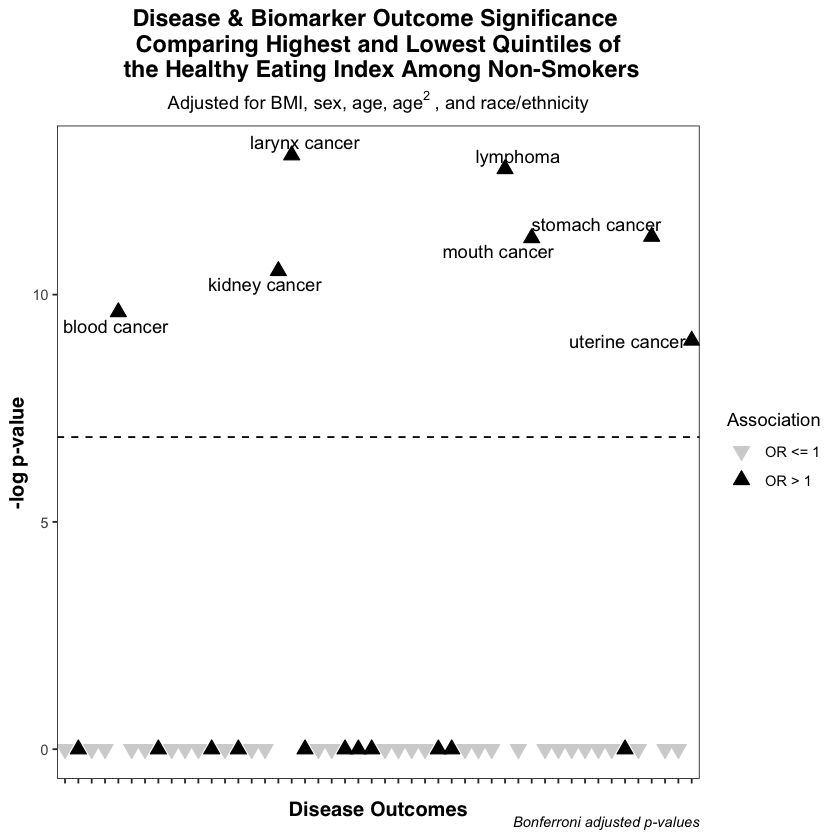

In [30]:
ggplot(hei0506_result_Nonsmoke, aes(Outcome, logbonf))+ 
geom_point(aes(color = Association, fill = Association, shape = Association), size=3)+
scale_shape_manual(values=c(25, 24))+
scale_fill_manual(values=c("lightgray","black"))+
scale_color_manual(values = c("lightgray", "black"))+
geom_text_repel(data = subset(hei0506_result_Nonsmoke, logbonf > -log(0.05/nrow(hei0506_result_Nonsmoke)) ),aes(label=Label))+
geom_hline(yintercept= (-log(0.05/nrow(hei0506_result_Nonsmoke))), linetype="dashed", color = "black")+
labs(title ="Disease & Biomarker Outcome Significance \n Comparing Highest and Lowest Quintiles of \n the Healthy Eating Index Among Non-Smokers",
     subtitle = bquote("Adjusted for BMI, sex, age,"~ age^2~", and race/ethnicity"),
     caption = "Bonferroni adjusted p-values")+
ylab("-log p-value")+
xlab("Disease Outcomes")+
#ggtitle("Disease & Biomarker Outcome Significance \n Comparing Highest and Lowest Quintiles of Healthy Eating Index")+
theme_bw()+
theme(axis.text.x = element_blank(), 
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      plot.subtitle = element_text(face = "italic", hjust = 0.5),
      plot.caption = element_text(face = "italic", hjust = 1),
      axis.title.x = element_text(family="Helvetica", face = "bold", size = 12, vjust = -2),
      axis.title.y = element_text(family="Helvetica", face = "bold", size = 12),
      plot.title=element_text(family = "Helvetica", face = "bold", size = 14, hjust=0.5))

Stratified analysis smong smokers

Subset dat and select disease variable

In [37]:

MainTableSmoke <- MainTable[ which(MainTable$SMQ040 == 1 | MainTable$SMQ040==2),]



MainTable_Health <- subset(MainTableSmoke, select = c("SEQN","SDMVPSU", "SDMVSTRA", "WTMEC2YR","RIDAGEYR","BMXBMI", "black", "mexican", "other_hispanic", "other_eth", "SMQ040", "male", "female", "any_diabetes", "any_ht", "cad", "bladder_cancer_self_report", "blood_cancer_self_report", "bone_cancer_self_report", "brain_cancer_self_report", "colon_cancer_self_report", "esophagus_cancer_self_report", "gallbladder_cancer_self_report", "kidney_cancer_self_report", "larynx_cancer_self_report", "leukemia_self_report", "liver_cancer_self_report", "lung_cancer_self_report", "lymphoma_self_report", "melanoma_self_report", "mouth_cancer_self_report", "nervous_cancer_self_report", "pancreatic_cancer_self_report", "prostate_cancer_self_report", "rectum_cancer_self_report", "skin_cancer_self_report", "other_skin_cancer_self_report", "soft_cancer_self_report", "stomach_cancer_self_report", "testis_cancer_self_report", "thyroid_cancer_self_report", "uterine_cancer_self_report", "other_cancer_self_report", "any_cancer_self_report", "any_family_cad", "current_asthma", "ever_asthma", "ever_arthritis", "ever_rheumatoid_arthritis", "ever_osteo_arthritis", "LBXHBC", "LBDHBG", "LBDHCV", "LBDHD", "LBXHBS", "LBXHA", "LBDHI"))


Biomarkers_Threshold <- subset(MainTableSmoke, select =c("LBXTC", "LBDLDL", "LBXTR", "LBXGH", "LBXGLU", "LBXVIA", "LBXVIC", "LBXVID", "LBXVIE",  "LBXB12", "LBXFOL", "LBXRBF", "LBXHCY"))


#*************Threshold values*************************

#Total cholesterol - Case <= 200
Biomarkers_Threshold$LBXTC_TH <- ifelse(Biomarkers_Threshold$LBXTC <= 200, 1, 0)
#LDL -  case < 100
Biomarkers_Threshold$LBDLDL_TH <- ifelse(Biomarkers_Threshold$LBDLDL <= 100, 1, 0)
#Triglycerides - case >= 150 
Biomarkers_Threshold$LBXTR_TH <- ifelse(Biomarkers_Threshold$LBXTR <= 150, 1, 0)
#Glycohemoglobin - case <= 5.7 
Biomarkers_Threshold$LBXGH_TH <- ifelse(Biomarkers_Threshold$LBXGH <= 5.7, 1, 0)
#Fasting Glucose -case <= 100
Biomarkers_Threshold$LBXGLU_TH <- ifelse(Biomarkers_Threshold$LBXGLU <= 100, 1, 0)
#Vitamin A - case >= 20 
Biomarkers_Threshold$LBXVIA_TH <- ifelse(Biomarkers_Threshold$LBXVIA >= 20, 1, 0)
#vitamin C - case >= 11.4
Biomarkers_Threshold$LBXVIC_TH <- ifelse(Biomarkers_Threshold$LBXVIC >= 11.4, 1, 0)
#vitamin D - case >= 20
Biomarkers_Threshold$LBXVID_TH <- ifelse(Biomarkers_Threshold$LBXVID >= 20, 1, 0)
#vitamin E - case >= 500
Biomarkers_Threshold$LBXVIE_TH <- ifelse(Biomarkers_Threshold$LBXVIE >= 500, 1, 0)
#vitamin B12 - case  >= 200
Biomarkers_Threshold$LBXB12_TH <- ifelse(Biomarkers_Threshold$LBXB12 >= 200, 1, 0)
#serum folate - case >= 2
Biomarkers_Threshold$LBXFOL_TH <- ifelse(Biomarkers_Threshold$LBXFOL >= 2, 1, 0)
#RBC FOLATE
Biomarkers_Threshold$LBXRBF_TH <- ifelse(Biomarkers_Threshold$LBXRBF >= 95, 1, 0)
#plasma homocysteine
Biomarkers_Threshold$LBXHCY_TH <- ifelse(Biomarkers_Threshold$LBXHCY <= 13, 1, 0)

Biomarkers_Threshold <- subset(Biomarkers_Threshold, select =c("LBXTC_TH", "LBDLDL_TH", "LBXTR_TH", "LBXGH_TH", "LBXGLU_TH", "LBXVIA_TH", "LBXVIC_TH", "LBXVID_TH", "LBXVIE_TH",  "LBXB12_TH", "LBXFOL_TH", "LBXRBF_TH", "LBXHCY_TH"))

Health_Biomarkers <- cbind(MainTable_Health, Biomarkers_Threshold)

phenotypesheath_biomarkers <- c("any_diabetes", "any_ht", "cad", "bladder_cancer_self_report", "blood_cancer_self_report", "bone_cancer_self_report", "brain_cancer_self_report", "colon_cancer_self_report", "esophagus_cancer_self_report", "gallbladder_cancer_self_report", "kidney_cancer_self_report", "larynx_cancer_self_report", "leukemia_self_report", "liver_cancer_self_report", "lung_cancer_self_report", "lymphoma_self_report", "melanoma_self_report", "mouth_cancer_self_report", "nervous_cancer_self_report", "pancreatic_cancer_self_report", "prostate_cancer_self_report", "rectum_cancer_self_report", "skin_cancer_self_report", "other_skin_cancer_self_report", "soft_cancer_self_report", "stomach_cancer_self_report", "testis_cancer_self_report", "thyroid_cancer_self_report", "uterine_cancer_self_report", "other_cancer_self_report", "any_cancer_self_report", "any_family_cad", "current_asthma", "ever_asthma", "ever_arthritis", "ever_rheumatoid_arthritis", "ever_osteo_arthritis", "LBXHBC", "LBDHBG", "LBDHCV", "LBDHD", "LBXHBS", "LBXHA", "LBDHI", "LBXTC_TH", "LBDLDL_TH", "LBXTR_TH", "LBXGH_TH", "LBXGLU_TH", "LBXVIA_TH", "LBXVIC_TH", "LBXVID_TH", "LBXVIE_TH",  "LBXB12_TH", "LBXFOL_TH", "LBXRBF_TH", "LBXHCY_TH")

Selecting dataframe, case, control and phenotype list

In [38]:
dataframe <- Health_Biomarkers
cut <- "quintile"
case <- 5
control <- 1
phenotypes <- phenotypesheath_biomarkers

Merging quintile values with working dataframe

In [39]:
hei0506_subset <- subset(hei0506, select = c("SEQN", cut))           #subset with grade or quintile and SEQN
hei0506_subset$SEQN <- as.character( hei0506_subset$SEQN )          #change both 'SEQN' columns to characters for merging
dataframe$SEQN <- as.character( dataframe$SEQN )

hei0506_merged <- merge(dataframe, hei0506_subset, by="SEQN")     #merging the grade or qunitile with dataframe

hei0506_merged_cut <- hei0506_merged[hei0506_merged[,cut] %in% c(case, control),]   #selecting cases & control


hei0506_casecontrol <- subset(hei0506_merged_cut, select=c("SEQN", cut))#subsetting so we just have SEQN+cut 

hei0506_casecontrol[cut] <- ifelse(hei0506_casecontrol[cut]==case, 1, 0) #Converting case control to binary

hei0506_final <- inner_join(hei0506_merged, hei0506_casecontrol, by = "SEQN")  #Merge phenotypes w/ binary input
colNumber <- length(hei0506_final) - 1
colnames(hei0506_final)[colNumber] <- "casecontrol"
colNumber <- length(hei0506_final)
colnames(hei0506_final)[colNumber] <- "casevalue"

Setting survey design

In [40]:
dsn <- svydesign(ids=~SDMVPSU, strata=~SDMVSTRA, weights=~WTMEC2YR, nest=T, data=hei0506_final, variables = NULL)

Creating dataframe matrix for results

In [41]:
hei0506_result_Smoke <- as.data.frame(matrix(ncol =8))

Running for loop for logistic regressions for all disease outcomes

In [43]:
for(i in 14:ncol(hei0506_final)-2){
                                                                                        
 print( i )

myglm <- svyglm(as.formula(paste0(names(hei0506_final)[i], "~ casevalue + black + mexican + other_hispanic + other_eth + RIDAGEYR + RIDAGEYR^2 + female + BMXBMI")),design = dsn,
                family = binomial(),
                na.action = na.omit)

#confidence interval
ci <- exp(summary(myglm)$coefficients["casevalue",1]+qnorm(c(0.025, 0.975)) * summary(myglm)$coefficients["casevalue",2])


excludedPatients <- sum(is.na(hei0506_final[, i ]))
    casecontrol <-  hei0506_final[, c(names(hei0506_final)[i], "SEQN", "casevalue")]
    casecontrol <- na.omit( casecontrol )
    heihighpositive <- length(unique(casecontrol[casecontrol[,1]== 1 & casecontrol$casevalue== 1, "SEQN"]))
    heihighnegative <- length(unique(casecontrol[casecontrol[,1]== 0 & casecontrol$casevalue== 1, "SEQN"]))
    heilowpositive <- length(unique(casecontrol[casecontrol[,1]== 1 & casecontrol$casevalue== 0, "SEQN"]))
    heilownegative <- length(unique(casecontrol[casecontrol[,1]== 0 & casecontrol$casevalue== 0, "SEQN"]))
 

    
newRow <- c (names(hei0506_final)[i], summary(myglm)$coefficients[2], exp(summary(myglm)$coefficients[2]), paste0("(", round(ci[1][1],3), ",", round(ci[2][1],3), ")"),
summary(myglm)$coefficients[2,4], paste0(heihighpositive+heilowpositive,"(",heihighpositive,"/",heilowpositive,")"), paste0(heihighnegative+heilownegative,"(",heihighnegative,"/",heilownegative,")"), excludedPatients
                  )
    
hei0506_result_Smoke <- rbind( newRow, hei0506_result_Smoke ) 


}


[1] 12


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 13


Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 7 in model.matrix: no columns are assigned”Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message in model.matrix.default(glm.object, data = structure(list(female = c(0, :
“the response appeared on the right-hand side and was dropped”Warning message in model.matrix.default(glm.object, data = structure(list(female = c(0, :
“problem with term 7 in model.matrix: no columns are assigned”

[1] 14


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 15


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 16


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 17


Warning message:
“glm.fit: algorithm did not converge”

[1] 18


Warning message:
“glm.fit: algorithm did not converge”

[1] 19


Warning message:
“glm.fit: algorithm did not converge”

[1] 20


Warning message:
“glm.fit: algorithm did not converge”

[1] 21


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 22


Warning message:
“glm.fit: algorithm did not converge”

[1] 23


Warning message:
“glm.fit: algorithm did not converge”

[1] 24


Warning message:
“glm.fit: algorithm did not converge”

[1] 25


Warning message:
“glm.fit: algorithm did not converge”

[1] 26


Warning message:
“glm.fit: algorithm did not converge”

[1] 27


Warning message:
“glm.fit: algorithm did not converge”

[1] 28


Warning message:
“glm.fit: algorithm did not converge”

[1] 29


Warning message:
“glm.fit: algorithm did not converge”

[1] 30


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 31


Warning message:
“glm.fit: algorithm did not converge”

[1] 32


Warning message:
“glm.fit: algorithm did not converge”

[1] 33


Warning message:
“glm.fit: algorithm did not converge”

[1] 34


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 35


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 36


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 37


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 38


Warning message:
“glm.fit: algorithm did not converge”

[1] 39


Warning message:
“glm.fit: algorithm did not converge”

[1] 40


Warning message:
“glm.fit: algorithm did not converge”

[1] 41


Warning message:
“glm.fit: algorithm did not converge”

[1] 42


Warning message:
“glm.fit: algorithm did not converge”

[1] 43


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 44


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 45


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 46


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 47


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 48


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 49


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 50


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 51


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 52


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 53


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 54


Warning message:
“glm.fit: algorithm did not converge”

[1] 55


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 56


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 57


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 58


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 59


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 60


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 61


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 62


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 63


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 64


Warning message:
“glm.fit: algorithm did not converge”

[1] 65


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 66


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 67


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

[1] 68


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”

[1] 69


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 70


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”

Renaming columns and adding columns with adjusted pvalues and OR designation

In [44]:
colnames( hei0506_result_Smoke) <- c("Outcome", "Coefficient", "OR", "CI", "P-value", "Outcome_Present", "Outcome_Negative", "NA_Patient")

hei0506_result_Smoke$padjustFdr <- p.adjust( as.numeric( hei0506_result_Smoke$`P-value`), method = "fdr")
hei0506_result_Smoke$padjustBonferroni <- p.adjust( as.numeric( hei0506_result_Smoke$`P-value`), method = "bonferroni")


hei0506_result_Smoke$logfdr <- -log( as.numeric(hei0506_result_Smoke$padjustFdr))
hei0506_result_Smoke$logbonf <- -log( as.numeric(hei0506_result_Smoke$padjustBonferroni))

hei0506_result_Smoke <- merge(hei0506_result_Smoke, Labels, by = "Outcome")

hei0506_result_Smoke$Association <- as.factor(ifelse(hei0506_result_Smoke$OR > 1, "OR > 1", "OR <= 1"))

head(hei0506_result_Smoke)


Outcome,Coefficient,OR,CI,P-value,Outcome_Present,Outcome_Negative,NA_Patient,padjustFdr,padjustBonferroni,logfdr,logbonf,Label,Association
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
any_cancer_self_report,-0.457776388887066,0.632688936667978,"(0.135,2.965)",0.579585949616306,19(5/14),309(87/222),0,0.9688262,1,0.03167009,0,any cancer,OR <= 1
any_diabetes,-0.122982191513787,0.884279410098284,"(0.315,2.479)",0.821836430530006,29(15/14),298(76/222),1,0.9688262,1,0.03167009,0,diabetes,OR <= 1
any_family_cad,-0.698689987214411,0.497236263177977,"(0.157,1.571)",0.272769922781287,54(12/42),261(79/182),13,0.9688262,1,0.03167009,0,family CAD,OR <= 1
any_ht,-0.0740475909697191,0.928627498506484,"(0.523,1.649)",0.807656261523153,90(36/54),238(56/182),0,0.9688262,1,0.03167009,0,hypertension,OR <= 1
blood_cancer_self_report,-0.0101191654836878,0.989931861011133,"(0.622,1.574)",0.96709522593434,0(0/0),309(87/222),19,0.9688262,1,0.03167009,0,blood cancer,OR <= 1
bone_cancer_self_report,-0.0101191654836878,0.989931861011133,"(0.622,1.574)",0.96709522593434,0(0/0),309(87/222),19,0.9688262,1,0.03167009,0,bone cancer,OR <= 1


Using ggplot to produce manhattan plot for results

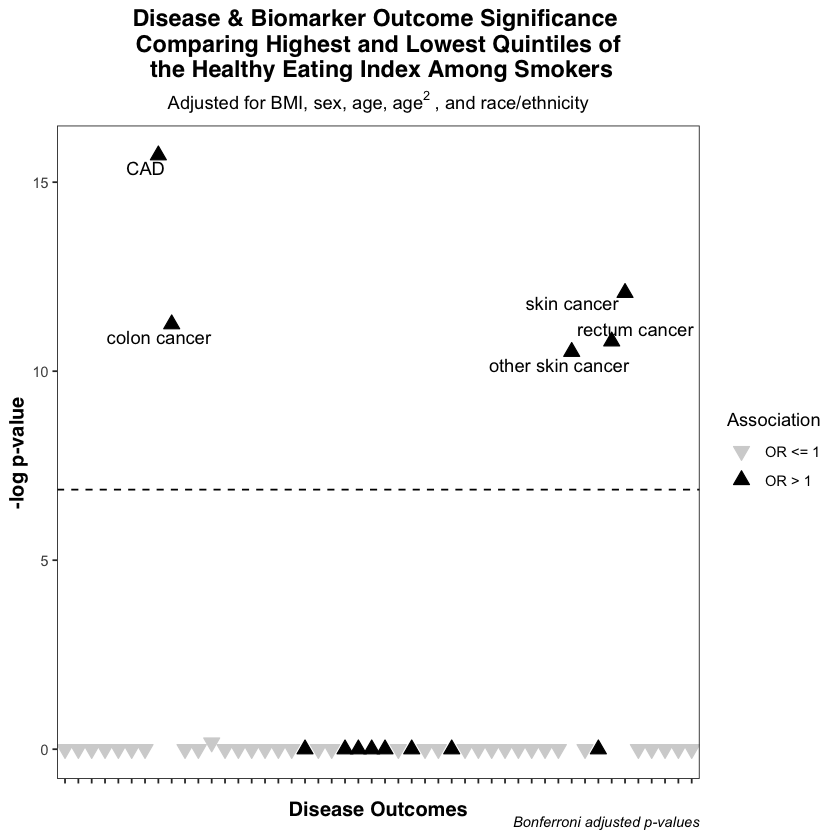

In [45]:
ggplot(hei0506_result_Smoke, aes(Outcome, logbonf))+ 
geom_point(aes(color = Association, fill = Association, shape = Association), size=3)+
scale_shape_manual(values=c(25, 24))+
scale_fill_manual(values=c("lightgray","black"))+
scale_color_manual(values = c("lightgray", "black"))+
geom_text_repel(data = subset(hei0506_result_Smoke, logbonf > -log(0.05/nrow(hei0506_result_Smoke)) ),aes(label=Label))+
geom_hline(yintercept= (-log(0.05/nrow(hei0506_result_Smoke))), linetype="dashed", color = "black")+
labs(title ="Disease & Biomarker Outcome Significance \n Comparing Highest and Lowest Quintiles of \n the Healthy Eating Index Among Smokers",
     subtitle = bquote("Adjusted for BMI, sex, age,"~ age^2~", and race/ethnicity"),
     caption = "Bonferroni adjusted p-values")+
ylab("-log p-value")+
xlab("Disease Outcomes")+
#ggtitle("Disease & Biomarker Outcome Significance \n Comparing Highest and Lowest Quintiles of Healthy Eating Index")+
theme_bw()+
theme(axis.text.x = element_blank(), 
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      plot.subtitle = element_text(face = "italic", hjust = 0.5),
      plot.caption = element_text(face = "italic", hjust = 1),
      axis.title.x = element_text(family="Helvetica", face = "bold", size = 12, vjust = -2),
      axis.title.y = element_text(family="Helvetica", face = "bold", size = 12),
      plot.title=element_text(family = "Helvetica", face = "bold", size = 14, hjust=0.5))